# Introduction -- WeRatedogs Wrangling and Analysis

The dataset that i will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs.\
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has received international media coverage.

This project is part of the Udacity Data Analysis Professional Nanodegree Program, Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

In [1]:
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# Gathering data

### 1-Gathering data from Twitter Archive  into DataFrame

In [2]:
#reading Twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 2-Gathering data from the Image Prediction  into DataFrame

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [3]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

### 3-Gathering data from Twitter API into a list then append it to tweet_json.txt 
 

In [7]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:
tweets_found = []
tweets_not_found_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        tweets_found.append(api.get_status(tweet_id))
    except Exception as e:
        tweets_not_found_ids.append(tweet_id)

Rate limit reached. Sleeping for: 478
Rate limit reached. Sleeping for: 477


In [9]:
print("The list of tweets" ,len(tweets_found))
print("The list of tweets no found" , len(tweets_not_found_ids))

The list of tweets 2331
The list of tweets no found 25


In [12]:
list_of_dicts = []
for json_tweet1 in tweets_found:
    list_of_dicts.append(json_tweet1)

In [13]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [4]:
df_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for dictionary in all_data:
        tweet_id = dictionary['id']
        whole_tweet = dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = dictionary['favorite_count']
        retweet_count = dictionary['retweet_count']
        followers_count = dictionary['user']['followers_count']
        friends_count = dictionary['user']['friends_count']
        whole_source = dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = dictionary['retweeted_status'] = dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        df_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])


In [5]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34986,7342,8981793,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30294,5478,8981793,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22789,3622,8981793,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38250,7531,8981793,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36530,8110,8981793,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [6]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


# Assessing 

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_archive[twitter_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [9]:
twitter_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2096,670755717859713024,NaN,NaN,2015-11-29 00:06:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gin &amp; Tonic. They're having a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670755717...,9,10,Gin,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1596,686286779679375361,NaN,NaN,2016-01-10 20:41:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When bae calls your name from across the room....,NaN,NaN,NaN,https://vine.co/v/iMZx6aDbExn,12,10,None,None,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None
1159,724046343203856385,NaN,NaN,2016-04-24 01:24:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sarge. Not even he knows what his tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724046343...,10,10,Sarge,None,None,None,None
1882,674999807681908736,6.747934e+17,4.196984e+09,2015-12-10 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ok last one of these. I may try to make some m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674999807...,13,10,None,None,None,None,None
1694,681281657291280384,NaN,NaN,2015-12-28 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sarge. His parents signed him up for danc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681281657...,11,10,Sarge,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [12]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [14]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
image_prediction.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True
1426,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.175915,True,black-footed_ferret,0.096534,False,toy_poodle,0.064145,True
538,676949632774234114,https://pbs.twimg.com/media/CWUCGMtWEAAjXnS.jpg,1,Welsh_springer_spaniel,0.206479,True,Saint_Bernard,0.139339,True,boxer,0.114606,True
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
1549,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
1513,786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512,True,Cardigan,0.287178,True,chow,0.000570,True
1759,825829644528148480,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,2,Great_Pyrenees,0.853407,True,golden_retriever,0.053531,True,English_setter,0.045830,True
549,677530072887205888,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,1,Staffordshire_bullterrier,0.689259,True,Norwegian_elkhound,0.026121,True,American_Staffordshire_terrier,0.023075,True


In [16]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
sum(image_prediction.jpg_url.duplicated())

66

In [18]:
pd.concat(j for _, j in image_prediction.groupby("jpg_url") if len(j) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [19]:
print(image_prediction.p1_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64


In [20]:
print(image_prediction.p2_dog.value_counts())

True     1553
False     522
Name: p2_dog, dtype: int64


In [21]:
print(image_prediction.p3_dog.value_counts())

True     1499
False     576
Name: p3_dog, dtype: int64


In [22]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
tweet_json.sample(20)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
165,858843525470990336,14594,3170,8981800,16,Twitter for iPhone,Original tweet,https://t.co/A1s7QG7tqa
1809,676121918416756736,2044,1086,8981885,16,Vine - Make a Scene,Original tweet,https://t.co/ICNIjSkrXs
91,874296783580663808,23815,3634,8981797,16,Twitter for iPhone,Original tweet,https://t.co/0YplNnSMEm
1752,677918531514703872,1265,383,8981868,16,Twitter for iPhone,Original tweet,https://t.co/lWL2IMJqLR
7,890729181411237888,58937,16466,8981793,16,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
1410,697270446429966336,4528,1799,8981858,16,Twitter for iPhone,Original tweet,https://t.co/7rS33sCKMS
2303,666396247373291520,151,72,8981902,16,Twitter for iPhone,Original tweet,https://t.co/Dc7b0E8qFE
1141,722974582966214656,3927,1488,8981852,16,Twitter for iPhone,Original tweet,https://t.co/eV1diwds8a
1264,708349470027751425,2259,704,8981856,16,Twitter for iPhone,Original tweet,https://t.co/tK7a0AxQfd
1138,723688335806480385,7328,2777,8981852,16,Twitter for iPhone,Original tweet,https://t.co/YgNuDQbv89


In [24]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [25]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

# Tidiness

## Quality 
 **Completeness, Validity, Accuracy(content issues)**

### twitter_archive
 1. Keep original ratings (no retweets) that have images. 
 2. Delete columns that won't be used for analysis. 
 3. Separate timestamp int year- month- day (3 columns)
    - timestamp is in string format instead of datetime
 4. correct numerators with decimals.
 5. Wrong numerators to be corrected.
 6. correct denominators other than 10
    - tweets with denominators not equal to 10 are usually multiple dogs.
 7. Editing name(dog name) column ( a, aa, the, None)

### image_prediction
 8. Drop 66 jpg_url duplicated
 9. Create onne column for image prediction and one for accuracy level.

### tweet_json
 10. keep original tweets(no retweets)
 11. convert favourite_count and retweet_count to integers

## Tidiness 
 1. Change tweet_id to type int64 to merge with the other 2 tables.
 2. All tables should be part of one dataset.
 3. Erroneous data types (doggo, floofer, pupper, puppo columns)- Melt into stages_of_dogs

# Cleaning

**Making a copy of each datafram**

In [26]:
twitter_archive_cleaned = twitter_archive.copy()
image_prediction_cleaned = image_prediction.copy()
tweet_json_cleaned = tweet_json.copy()

### **Define**

**Keep original ratings(delete retweets)**

**code**

In [27]:
#Twitter Archive - Deleting retweets
twitter_archive_cleaned = twitter_archive_cleaned[pd.isnull(twitter_archive_cleaned['retweeted_status_user_id'])]

**Test**

In [28]:
print(sum(twitter_archive_cleaned.retweeted_status_user_id.value_counts()))

0


### **Define** 

**Delete columns that wonn't be needed for analysis.**

**Code**

In [29]:
print(list(twitter_archive_cleaned))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [30]:
#Twitter Archive - Deleting unwanted columns
twitter_archive_cleaned = twitter_archive_cleaned.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'retweeted_status_id', 'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 'expanded_urls'], axis= 1)


**Test**

In [31]:
print(list(twitter_archive_cleaned))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


### **Define**

**Create one column for dog stages and dropping duplicates based on tweet_id**

**Code**

In [33]:
print(list(twitter_archive_cleaned))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [33]:
# handle none
twitter_archive_cleaned.doggo.replace('None', '', inplace=True)
twitter_archive_cleaned.floofer.replace('None', '', inplace=True)
twitter_archive_cleaned.pupper.replace('None', '', inplace=True)
twitter_archive_cleaned.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_cleaned['dog_stages'] = twitter_archive_cleaned.doggo + twitter_archive_cleaned.floofer + twitter_archive_cleaned.pupper + twitter_archive_cleaned.puppo

# handle multiple stages
twitter_archive_cleaned.loc[twitter_archive_cleaned.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
twitter_archive_cleaned.loc[twitter_archive_cleaned.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
twitter_archive_cleaned.loc[twitter_archive_cleaned.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

# handle missing values
twitter_archive_cleaned.loc[twitter_archive_cleaned.dog_stages == '', 'dog_stages'] = np.nan

In [38]:
#Droppong duplicates then sort by stages of dogs
twitter_archive_cleaned = twitter_archive_cleaned.sort_values('dog_stages').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [41]:
twitter_archive_cleaned['dog_stages'].value_counts()


pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stages, dtype: int64

In [43]:
#Dropping doggo, floofer, pupper, puppo
twitter_archive_cleaned = twitter_archive_cleaned.drop(['doggo','floofer','pupper','puppo'], axis=1)


**Test**

In [46]:
print(list(twitter_archive_cleaned))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'dog_stages']


### **Define**

**change timestamp into datetime**.

**Separate timestamp into year-month-day columns**

**Code**

In [40]:
#Twitter archive - converting timestamp to datetime type
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned['timestamp'])

In [41]:
#Twitter archive - making new columns for year, month, and day 
twitter_archive_cleaned['year'] = twitter_archive_cleaned['timestamp'].dt.year
twitter_archive_cleaned['month'] = twitter_archive_cleaned['timestamp'].dt.month
twitter_archive_cleaned['day'] = twitter_archive_cleaned['timestamp'].dt.day

In [42]:
#Then dropping timestamp column
twitter_archive_cleaned = twitter_archive_cleaned.drop('timestamp', axis = 1)

**Test**

In [43]:
list(twitter_archive_cleaned)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stages_of_dogs',
 'year',
 'month',
 'day']

In [44]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   text                2175 non-null   object
 2   rating_numerator    2175 non-null   int64 
 3   rating_denominator  2175 non-null   int64 
 4   name                2175 non-null   object
 5   stages_of_dogs      2175 non-null   object
 6   year                2175 non-null   int64 
 7   month               2175 non-null   int64 
 8   day                 2175 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 169.9+ KB


In [45]:
twitter_archive_cleaned[twitter_archive_cleaned.rating_denominator != 10]

,tweet_id,text,rating_numerator,rating_denominator,name,stages_of_dogs,year,month,day
2154,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,None,2015,11,16
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40...,44,40,None,None,2016,2,10
3631,684222868335505415,Someone help the girl is being mugged. Several...,121,110,None,None,2016,1,5
3630,684225744407494656,"Two sneaky puppers were not initially seen, mo...",143,130,None,None,2016,1,5
3659,682808988178739200,"I'm aware that I could've said 20/16, but here...",20,16,None,None,2016,1,1
3658,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,7,11,Darrel,None,2016,1,1
3594,686035780142297088,Yes I do realize a rating of 4/20 would've bee...,4,20,None,None,2016,1,10
3250,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80,None,None,2016,3,18
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None,2016,3,27
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50,None,None,2016,3,14


### **Define**

**Checking and correcting every text of tweet_id that has a rating_denominator not equal to 10**

**Code**

In [46]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
2154,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
3659,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16
3658,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
3594,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4,20
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [47]:
# Tweet_id                    Action
# 666287406224695296          update 9/10 rating
# 682808988178739200          To be deleted / no image
# 686035780142297088          To be deleted / not rating- just explaning a rating
# 722974582966214656          update 13/10 rating
# 716439118184652801          update 11/10
# 810984652412424192          To be deleted - no rating found
# 832088576586297345          To be deleted
# 835246439529840640          To be deleted - not a rating
# 740373189193256964          update 14/10 rating


In [48]:
# Twitter archive -Update rating_numerator and rating_denominator
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 716439118184652801), 'rating_numerator'] = 11
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 716439118184652801), 'rating_denominator'] = 10

twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 740373189193256964), 'rating_denominator'] = 10


In [49]:
# Twitter Archive - Delete unwanted tweets
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'] != 682808988178739200]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'] != 686035780142297088]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'] != 810984652412424192]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'] != 832088576586297345]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'] != 835246439529840640]

**Test**

In [50]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
3658,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80


In [51]:
#Testing one of the deleted tweets
twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'] == 810984652412424192]

,tweet_id,text,rating_numerator,rating_denominator,name,stages_of_dogs,year,month,day


In [52]:
# Twitter archive - checking rating_numerators = 0
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_cleaned[twitter_archive_cleaned['rating_numerator'] == 0][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
2440,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
3015,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


### **Define**

**correct rating numerator**

In [53]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_cleaned[twitter_archive_cleaned['rating_numerator'] > 20][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
4070,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [54]:
# Tweet_id                   Action
# 680494726643068929        update rating 11.26 / 10
# 786709082849828864        update rating 9.75 / 10
# 778027034220126208        update rating 11.27 / 10 

**Code**

In [55]:
# converting type to float to accept decimals
twitter_archive_cleaned[['rating_numerator', 'rating_denominator']] = twitter_archive_cleaned[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 680494726643068929), 'rating_denominator'] = 10

twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 786709082849828864), 'rating_denominator'] = 10

twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 778027034220126208), 'rating_denominator'] = 10


**Test**

In [56]:
twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'] == 786709082849828864]

,tweet_id,text,rating_numerator,rating_denominator,name,stages_of_dogs,year,month,day
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0,Logan,None,2016,10,13


### **Define**

**Checking decimals in rating_numerator, rating_denominator and updating them**

In [57]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_cleaned[twitter_archive_cleaned['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\samaa\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.00,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.00,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


In [ ]:
# Tweet Id                      Action
# 883482846933004288            rating 13.5 / 10
# 681340665377193984            rating 9.5 / 10

**code**

In [58]:
# Updating wrong decimal ratings
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_cleaned.loc[(twitter_archive_cleaned.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5

**Test**

In [59]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_cleaned[twitter_archive_cleaned['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\samaa\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


### **Define**

**Dropping 66 jpg_url duplicated**

**Code**

In [88]:
# Image Prediction - Deleting duplicated jpg url
image_prediction_cleaned = image_prediction_cleaned.drop_duplicates(subset=['jpg_url'], keep='last')

**Test**

In [89]:
sum(image_prediction_cleaned['jpg_url'].duplicated())

0

### **Define**

**create 1 column for image prediction and 1 for accuracy level**

**Code**

In [68]:
# Image Prediction - create 1 column for image prediction and 1 for accuracy level
dog_type = []
accuracy_list = []
#Get the first true prediction
def image(image_prediction_cleaned):
    if image_prediction_cleaned['p1_dog'] == True:
        dog_type.append(image_prediction_cleaned['p1'])
        accuracy_list.append(image_prediction_cleaned['p1_conf'])
    elif image_prediction_cleaned['p2_dog'] == True:
        dog_type.append(image_prediction_cleaned['p2'])
        accuracy_list.append(image_prediction_cleaned['p2_conf'])
    elif image_prediction_cleaned['p3_dog'] == True:
        dog_type.append(image_prediction_cleaned['p3'])
        accuracy_list.append(image_prediction_cleaned['p3_conf'])
    else:
        dog_type.append('Error')
        accuracy_list.append('Error')
image_prediction_cleaned.apply(image, axis=1)
image_prediction_cleaned['dog_type'] = dog_type
image_prediction_cleaned['accuracy_list'] = accuracy_list

In [69]:
image_prediction_cleaned = image_prediction_cleaned[image_prediction_cleaned['dog_type'] != 'Error']

**Test**

In [70]:
image_prediction_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       1751 non-null   int64  
 1   jpg_url        1751 non-null   object 
 2   img_num        1751 non-null   int64  
 3   p1             1751 non-null   object 
 4   p1_conf        1751 non-null   float64
 5   p1_dog         1751 non-null   bool   
 6   p2             1751 non-null   object 
 7   p2_conf        1751 non-null   float64
 8   p2_dog         1751 non-null   bool   
 9   p3             1751 non-null   object 
 10  p3_conf        1751 non-null   float64
 11  p3_dog         1751 non-null   bool   
 12  dog_type       1751 non-null   object 
 13  accuracy_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


### **Define**

**Delete unwanted columns**

**Code**

In [71]:
# Image Prediction - Delete unwanted columns
image_prediction_cleaned = image_prediction_cleaned.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], axis=1)

**Test**

In [72]:
image_prediction_cleaned.sample(15)

,tweet_id,jpg_url,dog_type,accuracy_list
1088,718971898235854848,https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg,golden_retriever,0.140394
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,pug,0.066736
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,pug,0.99912
394,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,Newfoundland,0.223101
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319
1670,813081950185472002,https://pbs.twimg.com/media/C0ilsa1XUAEHK_k.jpg,Doberman,0.909951
238,670434127938719744,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,Chesapeake_Bay_retriever,0.027351
291,671182547775299584,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,Rottweiler,0.331179
90,667538891197542400,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,Yorkshire_terrier,0.618957
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,Border_terrier,0.482452


### **Define**

**Keep original tweets only in tweet_json**

**Code**

In [73]:
# Tweet json - drop retweets
tweet_json_cleaned = tweet_json_cleaned[tweet_json_cleaned['retweeted_status'] == 'Original tweet']

**Test**

In [74]:
tweet_json_cleaned['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

In [75]:
tweet_json_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   int64 
 1   favorite_count    2168 non-null   int64 
 2   retweet_count     2168 non-null   int64 
 3   followers_count   2168 non-null   int64 
 4   friends_count     2168 non-null   int64 
 5   source            2168 non-null   object
 6   retweeted_status  2168 non-null   object
 7   url               2168 non-null   object
dtypes: int64(5), object(3)
memory usage: 152.4+ KB


### **Define**
**convert favourite_count and retweet_count to int64**

**Code**

In [76]:
tweet_json_cleaned['favorite_count'] = tweet_json_cleaned['favorite_count'].apply(int)
tweet_json_cleaned['retweet_count'] = tweet_json_cleaned['retweet_count'].apply(int)

**Test**

In [77]:
tweet_json_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   int64 
 1   favorite_count    2168 non-null   int64 
 2   retweet_count     2168 non-null   int64 
 3   followers_count   2168 non-null   int64 
 4   friends_count     2168 non-null   int64 
 5   source            2168 non-null   object
 6   retweeted_status  2168 non-null   object
 7   url               2168 non-null   object
dtypes: int64(5), object(3)
memory usage: 152.4+ KB


### **Define**

**Convert tweet_id to int**

**Code**

In [78]:
# Convert tweet_id to int
tweet_json_cleaned['tweet_id'] = tweet_json_cleaned['tweet_id'].apply(int)

**Test**

In [79]:
tweet_json_cleaned['tweet_id'].dtypes

dtype('int64')

### **Define**

**All tables shoud be part of one dataset**

**Code**

In [80]:
# Merging dataframes (Twitter Archive & Image Prediction)
twitter_df1 = pd.merge(twitter_archive_cleaned, image_prediction_cleaned, how = 'left', on = ['tweet_id'])

In [81]:
#Deleting rows with no image
twitter_df1 = twitter_df1[twitter_df1['jpg_url'].notnull()]

In [82]:
twitter_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1686 non-null   int64 
 1   timestamp           1686 non-null   object
 2   text                1686 non-null   object
 3   rating_numerator    1686 non-null   int64 
 4   rating_denominator  1686 non-null   int64 
 5   name                1686 non-null   object
 6   dog_stages          260 non-null    object
 7   jpg_url             1686 non-null   object
 8   dog_type            1686 non-null   object
 9   accuracy_list       1686 non-null   object
dtypes: int64(3), object(7)
memory usage: 144.9+ KB


In [83]:
#final merge all into twitter_df
twitter_df = pd.merge(twitter_df1, tweet_json_cleaned, how = 'left', on = ['tweet_id'])

**Test**

In [84]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1686 non-null   int64  
 1   timestamp           1686 non-null   object 
 2   text                1686 non-null   object 
 3   rating_numerator    1686 non-null   int64  
 4   rating_denominator  1686 non-null   int64  
 5   name                1686 non-null   object 
 6   dog_stages          260 non-null    object 
 7   jpg_url             1686 non-null   object 
 8   dog_type            1686 non-null   object 
 9   accuracy_list       1686 non-null   object 
 10  favorite_count      1679 non-null   float64
 11  retweet_count       1679 non-null   float64
 12  followers_count     1679 non-null   float64
 13  friends_count       1679 non-null   float64
 14  source              1679 non-null   object 
 15  retweeted_status    1679 non-null   object 
 16  url   

### **Define**

**Editing name column (a, the ,such)**

**Code**

In [85]:
# Editing name column (none - weird names [a,aa,the])
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in twitter_df.iterrows():  
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            c_name = re.findall(pattern_2, row['text'])[0]
            twitter_df.loc[index,'name'] = twitter_df.loc[index,'name'].replace(row['name'], c_name)

        except IndexError:
            twitter_df.loc[index,'name'] = np.nan

            
## Test
twitter_df.name.value_counts(dropna = False)

NaN          472
Cooper        10
Charlie       10
Lucy          10
Tucker         9
            ... 
Nimbus         1
Divine         1
Fred           1
Pete           1
Naphaniel      1
Name: name, Length: 856, dtype: int64

### **Define**

**Converting tweet_id into string**

**Code**

In [86]:
twitter_df['tweet_id'] = twitter_df['tweet_id'].astype(str)

**Test**

In [87]:
twitter_df['tweet_id'].dtypes

dtype('O')

# Storing Data 

In [91]:
twitter_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [92]:
twitter_df.sample(25)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_type,accuracy_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
372,856282028240666624,2017-04-23 23:01:59 +0000,"This is Cermet, Paesh, and Morple. They are ab...",14,10,Cermet,NaN,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,Chihuahua,0.876543,26069.0,5799.0,8981800.0,16.0,Twitter for iPhone,Original tweet,https://t.co/tK2h7fEVOk
1005,707420581654872064,2016-03-09 04:19:44 +0000,This is Keurig. He's a rare dog. Laughs like a...,4,10,Keurig,NaN,https://pbs.twimg.com/media/CdFDQVgWIAArslx.jpg,kuvasz,0.149391,2161.0,663.0,8981856.0,16.0,Twitter for iPhone,Original tweet,https://t.co/xOrUyj7K30
6,796484825502875648,2016-11-09 22:49:15 +0000,Here's a sleepy doggo that requested some assi...,12,10,NaN,doggo,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,cocker_spaniel,0.116924,7458.0,1721.0,8981808.0,16.0,Twitter for iPhone,Original tweet,https://t.co/bvkkqOjNDV
845,740711788199743490,2016-06-09 01:07:06 +0000,Here we are witnessing the touchdown of a pupn...,9,10,NaN,NaN,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,toy_poodle,0.388277,3266.0,900.0,8981849.0,16.0,Twitter for iPhone,Original tweet,https://t.co/CmLoKMbOHv
615,790581949425475584,2016-10-24 15:53:19 +0000,This is Duke. He sneaks into the fridge someti...,11,10,Duke,NaN,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,malinois,0.000153,20333.0,6955.0,8981810.0,16.0,Twitter for iPhone,Original tweet,https://t.co/Fd5WFDTMH4
1071,699079609774645248,2016-02-15 03:55:41 +0000,Meet Reagan. He's a Persnicketus Derpson. Grea...,8,10,Reagan,NaN,https://pbs.twimg.com/media/CbOhMUDXIAACIWR.jpg,schipperke,0.667324,2355.0,617.0,8981857.0,16.0,Twitter for iPhone,Original tweet,https://t.co/A2j2StfNgL
746,760290219849637889,2016-08-02 01:44:48 +0000,This is Rocco. He's doing his best. 13/10 some...,13,10,Rocco,NaN,https://pbs.twimg.com/ext_tw_video_thumb/76028...,Old_English_sheepdog,0.3022,26037.0,11070.0,8981815.0,16.0,Twitter Web Client,Original tweet,https://t.co/qFsl1nnXMv
1301,677314812125323265,2015-12-17 02:30:09 +0000,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",10,10,Tassy,NaN,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,Blenheim_spaniel,0.924127,1565.0,503.0,8981868.0,16.0,Twitter for iPhone,Original tweet,https://t.co/fgORpmTN9C
810,747933425676525569,2016-06-28 23:23:19 +0000,Pls don't send more sherks. I don't care how s...,11,10,NaN,NaN,https://pbs.twimg.com/media/CmExV2qWkAAn_pN.jpg,Samoyed,0.998201,6397.0,2449.0,8981848.0,16.0,Twitter for iPhone,Original tweet,https://t.co/oQqlOsla4R
213,705786532653883392,2016-03-04 16:06:36 +0000,"Seriously, add us 🐶 11/10 for sad wet pupper h...",11,10,NaN,pupper,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,Labrador_retriever,0.148496,1857.0,493.0,8981856.0,16.0,Twitter for iPhone,Original tweet,https://t.co/xwPE9faVZR


## Insights & Visulizations

### *1-Golden Retriever is the most common dog type*

In [95]:
# Golden Retriever is the most common dog type
twitter_df['dog_type'].value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      62
                       ... 
Scotch_terrier            1
Japanese_spaniel          1
EntleBucher               1
Bouvier_des_Flandres      1
clumber                   1
Name: dog_type, Length: 113, dtype: int64

### *Fisrt Visualization

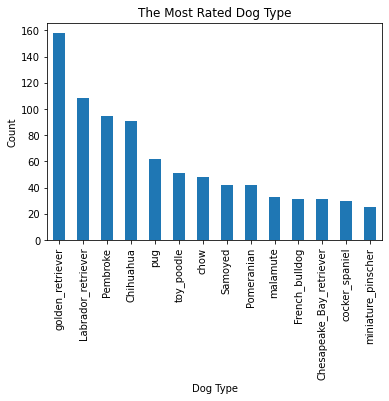

In [96]:
dog_type_df = twitter_df.groupby('dog_type').filter(lambda x: len(x) >= 25)

dog_type_df['dog_type'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Dog Type')
plt.xlabel('Dog Type')
plt.ylabel('Count')
fig = plt.gcf() 
fig.savefig('first_vis.png',bbox_inches='tight');

### *2- Japanese_spaniel has the lowest average rate*

In [97]:
df_dog_type_mean = twitter_df.groupby('dog_type').mean()

In [98]:
df_dog_type_mean.head()

,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,
Afghan_hound,9.666667,10.0,15245.333333,4987.666667,8.981806e+06,16.0
Airedale,9.833333,10.0,4656.416667,1171.583333,8.981858e+06,16.0
American_Staffordshire_terrier,10.312500,10.0,7457.600000,1730.266667,8.981837e+06,16.0
Appenzeller,11.000000,10.0,6482.500000,1202.500000,8.981826e+06,16.0
Australian_terrier,11.500000,10.0,9872.500000,2609.000000,8.981828e+06,16.0


In [99]:
df_dog_type_sorted = df_dog_type_mean['rating_numerator'].sort_values()

In [100]:
df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
Maltese_dog                     9.315789
                                 ...    
chow                           14.166667
Great_Pyrenees                 14.666667
West_Highland_white_terrier    14.687500
soft-coated_wheaten_terrier    20.800000
clumber                        27.000000
Name: rating_numerator, Length: 113, dtype: float64

In [101]:
print(twitter_df.loc[twitter_df.dog_type == 'Japanese_spaniel', 'url']) 

1302    https://t.co/IoLRvF0Kak
Name: url, dtype: object


### *3- Highest rate was for Labrador_retriever dogs and their puppies playing around*

In [102]:
# highest rate was for Labrador_retriever dogs and their puppies playing around 
print(twitter_df.loc[twitter_df['rating_numerator'].idxmax()])

tweet_id                                             758467244762497024
timestamp                                     2016-07-28 01:00:57 +0000
text                  Why does this never happen at my front door......
rating_numerator                                                    165
rating_denominator                                                  150
name                                                                NaN
dog_stages                                                          NaN
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/75846...
dog_type                                             Labrador_retriever
accuracy_list                                                  0.436377
favorite_count                                                   4656.0
retweet_count                                                    2133.0
followers_count                                               8981847.0
friends_count                                                   

In [103]:
print(twitter_df.loc[twitter_df.dog_type == 'golden_retriever', 'url']) 

3       https://t.co/C6fUMnHt1H
4       https://t.co/TVXpEJB7Wn
5       https://t.co/gBUDjdEcqz
17      https://t.co/UACnoyi8zu
18      https://t.co/mvnBGaWULV
                 ...           
1634    https://t.co/DKhgkMx4N1
1641    https://t.co/QZAnwgnOMB
1666    https://t.co/VFKG1vxGjB
1676    https://t.co/RhUEAloehK
1678    https://t.co/yWBqbrzy8O
Name: url, Length: 158, dtype: object


### *4- Favorite counts are correlated with retweet counts ( Positive correlation)*

C:\Users\samaa\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


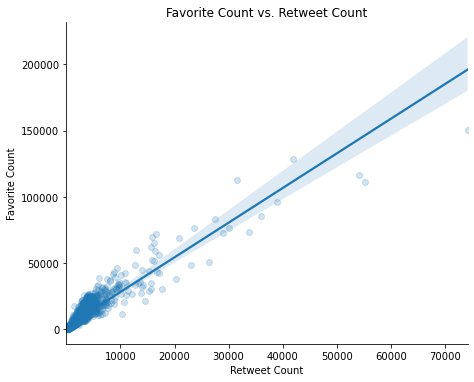

In [104]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_df,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');
fig = plt.gcf() 
fig.savefig('sec_vis.png',bbox_inches='tight');

### *5- Dog types with low number of ratings have a high variaty of mean ratings*

In [105]:
df_dog_type_count = twitter_df.groupby('dog_type').count()

In [106]:
dog_type_count = df_dog_type_count['rating_numerator']
dog_type_mean = df_dog_type_mean['rating_numerator']

In [107]:
dog_type_mean['golden_retriever']

13.0

In [108]:
dog_type_mean

dog_type
Afghan_hound                       9.666667
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.039216
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating_numerator, Length: 113, dtype: float64

In [109]:
df = pd.DataFrame()
df['Count_of_dog_type'] = dog_type_count
df['Mean_of_dog_type'] = dog_type_mean

In [110]:
df

,Count_of_dog_type,Mean_of_dog_type
dog_type,,
Afghan_hound,3,9.666667
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
...,...,...
toy_poodle,51,11.039216
toy_terrier,3,10.333333
vizsla,13,10.846154


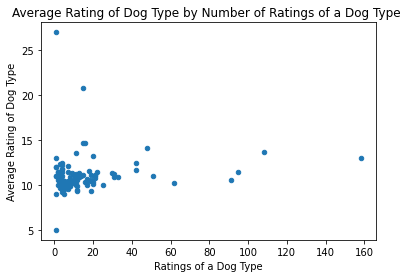

In [111]:
df.plot(x='Count_of_dog_type', y='Mean_of_dog_type', kind='scatter')
plt.xlabel('Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type ')
fig = plt.gcf()
fig.savefig('third_vis.png',bbox_inches='tight');